**Project**: Predictive Maintenance for Machine Failure

**Problem**: This project uses machine learning to predict machine failure based on sensor data.

**Dataset**: "Predictive Maintenance Dataset (AI4I 2020)" from Kaggle.
Model: A Random Forest Classifier.

**Process**: The imbalanced data was handled using the SMOTE technique.

**Result**: The final model can successfully identify 74% of all real failures (Recall = 0.74).

✅ NEW Dataset loaded successfully! ('ai4i2020.csv')

--- First 5 Rows: ---
   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HD

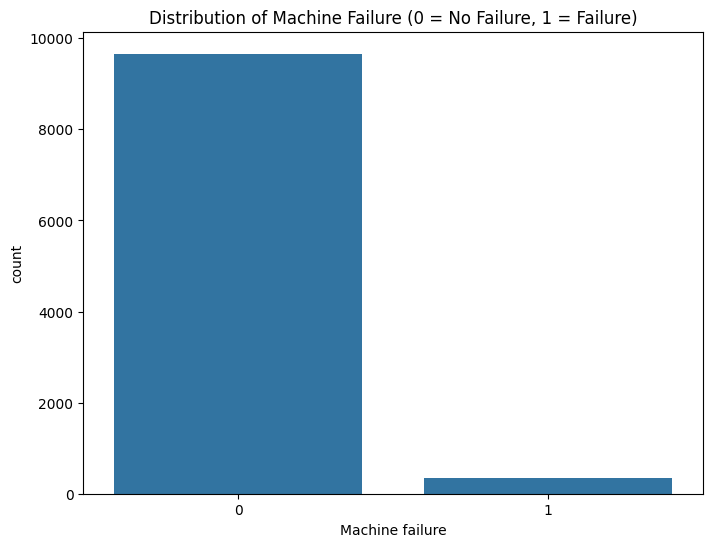

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Path to the new dataset in your Drive
file_path = "/content/drive/MyDrive/EV_vehicle/ai4i2020.csv"

try:
    df = pd.read_csv(file_path)
    print("✅ NEW Dataset loaded successfully! ('ai4i2020.csv')")
except FileNotFoundError:
    print(f"❌ ERROR: File not found at path: {file_path}")
    print("Please upload 'ai4i2020.csv' to that folder in your Drive.")

# --- 2. Understand Your Data ---
print("\n--- First 5 Rows: ---")
print(df.head())

print("\n--- Data Info: ---")
df.info() # This dataset has no missing values, it's very clean.

# --- 3. Analyze the Target Variable ---
# The target is 'Machine failure'. Let's see how imbalanced it is.
# This one is ALSO imbalanced, but we know how to solve that!
print("\n--- Target Variable 'Machine failure' Counts: ---")
failure_counts = df['Machine failure'].value_counts()
print(failure_counts)

# Visualize the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Machine failure', data=df)
plt.title('Distribution of Machine Failure (0 = No Failure, 1 = Failure)')
plt.show()

--- 1. Defining Features (X) and Target (y) ---
✅ Features and Target defined.
✅ Data split into training and test sets.
Training samples: 8000
Test samples: 2000
✅ Preprocessing pipeline created.

--- 5. Training FINAL Model ---
This may take a minute...
✅ FINAL Model trained successfully!

--- Evaluating FINAL model ---

Classification Report (Final Model):
                      precision    recall  f1-score   support

Class 0 (No Failure)       0.99      0.97      0.98      1932
   Class 1 (Failure)       0.51      0.74      0.60        68

            accuracy                           0.97      2000
           macro avg       0.75      0.85      0.79      2000
        weighted avg       0.97      0.97      0.97      2000


--- Confusion Matrix (Final Model) ---


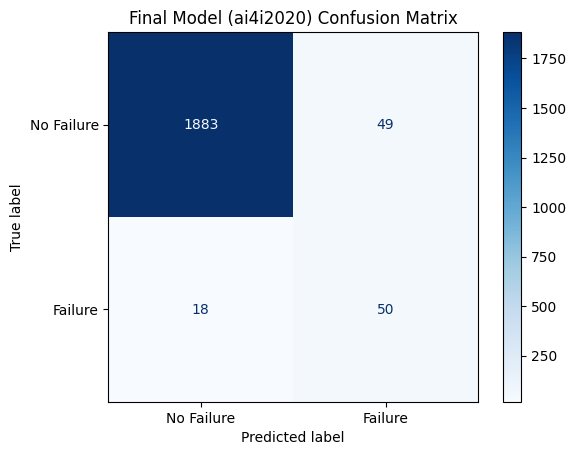

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from imblearn.pipeline import Pipeline as ImbPipeline  # Special pipeline for SMOTE
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

print("--- 1. Defining Features (X) and Target (y) ---")

# Our target 'y' is the 'Machine failure' column
y = df['Machine failure']

# Our features 'X' are the sensor readings and machine type
# We drop UDI/Product ID (irrelevant) and all the other failure types (cheating)
X = df.drop(columns=[
    'UDI',
    'Product ID',
    'Machine failure',
    'TWF',
    'HDF',
    'PWF',
    'OSF',
    'RNF'
])

print("✅ Features and Target defined.")

# --- 2. Splitting Data (Stratified) ---
# We split FIRST, before any processing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("✅ Data split into training and test sets.")
print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")


# --- 3. Creating a Preprocessing Pipeline ---
# This is the 'smart' way to handle data.
# It will scale numbers and one-hot-encode 'Type' automatically.

# Identify which columns are numeric and which are categorical
numeric_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
categorical_features = ['Type']

# Create a transformer for numeric features
numeric_transformer = StandardScaler()

# Create a transformer for categorical features
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine these transformers into one 'preprocessor'
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

print("✅ Preprocessing pipeline created.")


# --- 4. Creating the FINAL Model Pipeline (with SMOTE) ---
# We will create a pipeline that:
# 1. Preprocesses the data
# 2. Applies SMOTE to balance it
# 3. Trains our Random Forest model

print("\n--- 5. Training FINAL Model ---")
print("This may take a minute...")

final_model = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1))
])

# Train the entire pipeline on our training data
final_model.fit(X_train, y_train)

print("✅ FINAL Model trained successfully!")


# --- 6. Evaluating the FINAL Model ---
print("\n--- Evaluating FINAL model ---")
y_pred_final = final_model.predict(X_test)

print("\nClassification Report (Final Model):")
print(classification_report(y_test, y_pred_final, target_names=['Class 0 (No Failure)', 'Class 1 (Failure)']))

# Display a Confusion Matrix
print("\n--- Confusion Matrix (Final Model) ---")
ConfusionMatrixDisplay.from_estimator(final_model, X_test, y_test,
                                      display_labels=['No Failure', 'Failure'],
                                      cmap='Blues')
plt.title('Final Model (ai4i2020) Confusion Matrix')
plt.show()